In [1]:
import tensorflow as tf
import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sys
import io

            sw       lw      pre    u10    vpd       lh  \
0      194.864  341.868   86.925  1.526  4.807  50.8202   
1      205.404  324.689   87.133  1.200  5.489  51.0719   
2      233.936  324.139   87.015  1.365  5.344  74.3331   
3      240.066  330.219   86.840  1.250  6.073  52.6617   
4      298.513  290.818   86.613  2.114  6.108  51.9013   
...        ...      ...      ...    ...    ...      ...   
17404  119.309  259.904  100.657  1.101  3.254  12.1627   
17405  126.007  260.870  100.496  1.199  3.274  13.9846   
17406   94.095  288.536  100.126  1.283  1.880  10.5605   
17407  129.525  262.488  100.052  2.101  4.960  23.5488   
17408  134.304  226.817   99.784  1.232  4.476  10.3520   

       mean_2m_air_temperature  total_precipitation  
0                   285.867889             0.031049  
1                   287.354462             0.000418  
2                   287.928009             0.001824  
3                   286.599335             0.000678  
4                   2

<AxesSubplot:>

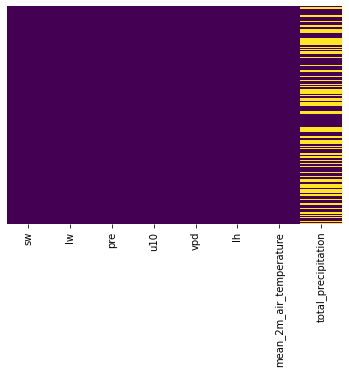

In [4]:
data2=pd.read_csv('00Table_no99.csv')
print(data2)
zero_mask = (data2 == 0)
sns.heatmap(zero_mask,yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data_all = np.array(data2)
#X = data_all[ : , :5]
X = data_all[:, [i for i in range(data_all.shape[1]) if i not in [5]]]
#X = data_all[:, [i for i in range(data_all.shape[1]) if i not in [5, 7]]]
y = data_all[ : , 5]

# Scaling and Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101, shuffle=True)

# Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train= scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
X_train.shape

(12186, 7)

In [14]:
X_test.shape

(5223, 7)

# Creating a Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [39]:
#def build_model():
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
    #return model

# Training the Model

In [40]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=150,epochs=500)

Epoch 1/500
82/82 [==============================] - 1s 4ms/step - loss: 4373.5898 - val_loss: 2587.0774
Epoch 2/500
82/82 [==============================] - 0s 3ms/step - loss: 2487.1484 - val_loss: 2191.4380
Epoch 3/500
82/82 [==============================] - 0s 3ms/step - loss: 2143.0981 - val_loss: 1816.3347
Epoch 4/500
82/82 [==============================] - 0s 3ms/step - loss: 1858.9921 - val_loss: 1601.7020
Epoch 5/500
82/82 [==============================] - 0s 3ms/step - loss: 1685.1758 - val_loss: 1483.7642
Epoch 6/500
82/82 [==============================] - 0s 3ms/step - loss: 1567.4149 - val_loss: 1395.8975
Epoch 7/500
82/82 [==============================] - 0s 3ms/step - loss: 1484.1334 - val_loss: 1350.4534
Epoch 8/500
82/82 [==============================] - 0s 3ms/step - loss: 1425.7762 - val_loss: 1304.7910
Epoch 9/500
82/82 [==============================] - 0s 3ms/step - loss: 1386.2812 - val_loss: 1271.1453
Epoch 10/500
82/82 [==============================] - 0

82/82 [==============================] - 0s 3ms/step - loss: 805.6780 - val_loss: 800.8102
Epoch 158/500
82/82 [==============================] - 0s 3ms/step - loss: 812.5946 - val_loss: 794.3431
Epoch 159/500
82/82 [==============================] - 0s 3ms/step - loss: 803.8818 - val_loss: 799.1511
Epoch 160/500
82/82 [==============================] - 0s 3ms/step - loss: 812.3831 - val_loss: 790.5642
Epoch 161/500
82/82 [==============================] - 0s 3ms/step - loss: 809.0958 - val_loss: 818.3790
Epoch 162/500
82/82 [==============================] - 0s 3ms/step - loss: 805.6765 - val_loss: 789.5687
Epoch 163/500
82/82 [==============================] - 0s 3ms/step - loss: 802.5057 - val_loss: 788.5184
Epoch 164/500
82/82 [==============================] - 0s 3ms/step - loss: 821.2471 - val_loss: 808.5698
Epoch 165/500
82/82 [==============================] - 0s 3ms/step - loss: 819.2835 - val_loss: 790.7876
Epoch 166/500
82/82 [==============================] - 0s 3ms/step - 

82/82 [==============================] - 0s 3ms/step - loss: 713.3971 - val_loss: 823.3503
Epoch 314/500
82/82 [==============================] - 0s 3ms/step - loss: 714.2468 - val_loss: 724.7619
Epoch 315/500
82/82 [==============================] - 0s 3ms/step - loss: 709.2048 - val_loss: 715.5320
Epoch 316/500
82/82 [==============================] - 0s 3ms/step - loss: 702.6895 - val_loss: 725.1887
Epoch 317/500
82/82 [==============================] - 0s 3ms/step - loss: 709.4064 - val_loss: 728.3678
Epoch 318/500
82/82 [==============================] - 0s 3ms/step - loss: 705.1729 - val_loss: 716.0076
Epoch 319/500
82/82 [==============================] - 0s 3ms/step - loss: 704.5010 - val_loss: 722.7314
Epoch 320/500
82/82 [==============================] - 0s 3ms/step - loss: 704.8137 - val_loss: 718.6744
Epoch 321/500
82/82 [==============================] - 0s 3ms/step - loss: 703.9647 - val_loss: 710.4890
Epoch 322/500
82/82 [==============================] - 0s 3ms/step - 

82/82 [==============================] - 0s 3ms/step - loss: 681.6356 - val_loss: 695.4451
Epoch 470/500
82/82 [==============================] - 0s 3ms/step - loss: 679.6099 - val_loss: 702.5480
Epoch 471/500
82/82 [==============================] - 0s 3ms/step - loss: 674.5767 - val_loss: 698.7212
Epoch 472/500
82/82 [==============================] - 0s 3ms/step - loss: 678.7596 - val_loss: 690.1075
Epoch 473/500
82/82 [==============================] - 0s 3ms/step - loss: 677.4943 - val_loss: 693.4003
Epoch 474/500
82/82 [==============================] - 0s 3ms/step - loss: 677.9597 - val_loss: 703.2673
Epoch 475/500
82/82 [==============================] - 0s 3ms/step - loss: 686.7802 - val_loss: 731.0245
Epoch 476/500
82/82 [==============================] - 0s 3ms/step - loss: 683.4114 - val_loss: 695.2562
Epoch 477/500
82/82 [==============================] - 0s 3ms/step - loss: 677.8323 - val_loss: 723.5820
Epoch 478/500
82/82 [==============================] - 0s 3ms/step - 

<AxesSubplot:>

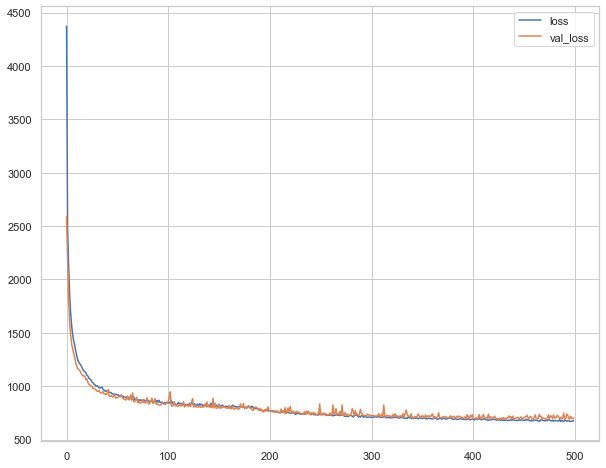

In [41]:
losses = pd.DataFrame(model.history.history)

losses.plot(figsize=(10, 8))

# Evaluation on Test Data

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score

Predicting on Brand New Data

In [21]:
X_test

array([[3.69921852e-01, 3.57420007e-01, 7.87207740e-01, ...,
        1.33620133e-01, 4.80649813e-01, 0.00000000e+00],
       [4.38761562e-01, 4.91495418e-01, 7.71674281e-01, ...,
        2.39363304e-01, 5.35098074e-01, 1.46309495e-08],
       [1.31390716e-01, 5.87194144e-01, 7.94517603e-01, ...,
        8.56313186e-02, 4.84402715e-01, 3.73943953e-02],
       ...,
       [8.96748015e-01, 4.81463482e-01, 1.00510615e-01, ...,
        3.24628952e-01, 7.42654687e-01, 1.46309495e-08],
       [2.80763235e-01, 2.34336913e-01, 7.92152647e-01, ...,
        1.79608518e-02, 2.29823779e-01, 0.00000000e+00],
       [9.22084747e-01, 6.44797741e-01, 7.65009406e-01, ...,
        3.46633685e-01, 6.61526139e-01, 0.00000000e+00]])

In [42]:
# Define a custom scoring function
def custom_scoring(estimator, X, y_true):
    y_pred = estimator.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    return -mse 

In [43]:
predictions = model.predict(X_test)

164/164 [==============================] - 0s 1ms/step


In [44]:
print('The mean absolute error (MAE) is:',mean_absolute_error(y_test,predictions))
print('The Mean sqaured error(MSE) is:',np.sqrt(mean_squared_error(y_test,predictions)))
print('The variance is:', explained_variance_score(y_test,predictions))
print("R-squared (R2) Score:", r2_score(y_test,predictions))

The mean absolute error (MAE) is: 17.983827864175417
The Mean sqaured error(MSE) is: 26.510047014399323
The variance is: 0.7056867292767033
R-squared (R2) Score: 0.7046664888393172


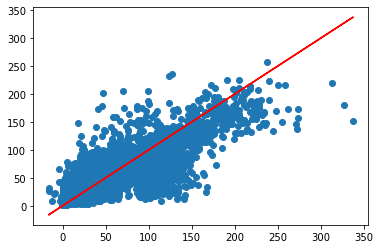

In [25]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

C:\Users\49152\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

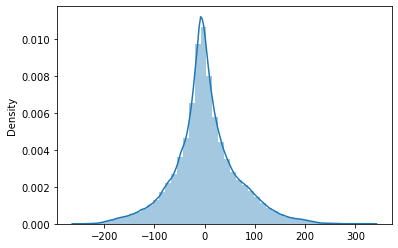

In [26]:
errors = y_test - predictions
sns.distplot(errors)

coefficient of determination R^2 = 0.7046664888393172


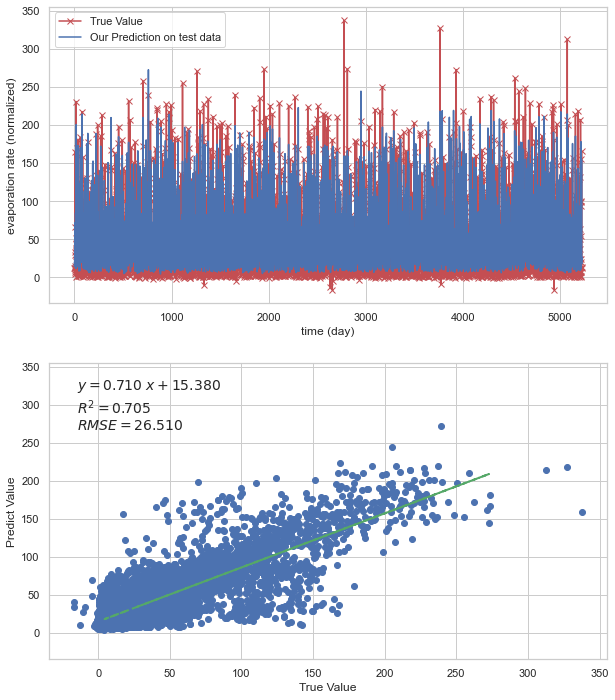

In [45]:
# plot the data
# Plot the data points
output=predictions
fig,ax=plt.subplots(2, 1, figsize=(10, 12), sharey=True)

sns.set(style='whitegrid')
# Plot the true value and predicted value
ax[0].plot( y_test, marker='x', c='r',label='True Value')
ax[0].plot( output , c='b',label='Our Prediction on test data')
ax[0].set(xlabel="time (day)", ylabel="evaporation rate (normalized)")

# Create scatter plot with regression line
#sns.scatterplot(y_test, output.flatten(), ax=ax[1])
#sns.regplot(y_test, output.flatten(), ax=ax[1])
ax[1].scatter( y_test , output.flatten() , c='b')
z = np.polyfit(y_test , output.flatten() , 1)
#z=output
# Our predictions
#...plt.scatter(y_test,predictions)

# Perfect predictions
#...plt.plot(y_test,y_test,'r')

# Calculate regression line parameters

y_hat = np.poly1d(z)(output)
plt.plot(output,y_hat, "g--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test,predictions):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, predictions, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.ylabel('Predict Value')

# Set the x-axis label
plt.xlabel('True Value')
ax[0].legend()
print("coefficient of determination R^2 =",r2_score(y_test,predictions))

plt.show()